In [1]:
import pandas as pd
import numpy as np
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
strP = 'Z:\One Drive Main Folder\OneDrive - Regis University\Regis\MSDS 696 - PRACTICUM II\W4\\'

In [3]:
gms = pd.read_csv(strP + 'SteamData_W4_Cleaned.csv',encoding = "ISO-8859-1")

In [4]:
gms.head()

,Game_ID,Site,Description,PCT_Pos_Rev,Total_Rev,Developer,Developer_Count,Developer_Primary,Publisher,Publisher_Count,...,Simulation,Sports,Strategy,Franchise,Franchise_YN,Franchise_Count,Metacritic,Price,Purchase_Options,FinalReleaseDt
0,782330,https://store.steampowered.com/app/782330/DOOM...,Hells armies have invaded Earth. Become the S...,85.0,59927.0,id Software,1,id Software,Bethesda Softworks,1,...,N,N,N,DOOM,Y,9.0,88.0,59.99,3,3/19/2020
1,570,https://store.steampowered.com/app/570/Dota_2/...,"Every day, millions of players worldwide enter...",84.0,1333619.0,Valve,1,Valve,Valve,1,...,N,N,Y,NaN,N,NaN,90.0,0.00,2,7/9/2013
2,976730,https://store.steampowered.com/app/976730/Halo...,The Master Chiefs iconic journey includes six...,91.0,86340.0,"343 Industries, Splash Damage, Ruffian Games, ...",5,343 Industries,Xbox Game Studios,1,...,N,N,N,Halo,Y,1.0,NaN,39.99,2,12/3/2019
3,1174180,https://store.steampowered.com/app/1174180/Red...,Winner of over 175 Game of the Year Awards and...,76.0,83987.0,Rockstar Games,1,Rockstar Games,Rockstar Games,1,...,N,N,N,Red Dead Redemption,Y,1.0,93.0,59.99,3,12/5/2019
4,397540,https://store.steampowered.com/app/397540/Bord...,"The original shooter-looter returns, packing b...",82.0,33254.0,Gearbox Software,1,Gearbox Software,2K,1,...,N,N,N,Borderlands,Y,4.0,81.0,59.99,4,3/13/2020


In [5]:
gms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15726 entries, 0 to 15725
Data columns (total 51 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Game_ID                15726 non-null  int64  
 1   Site                   15726 non-null  object 
 2   Description            15724 non-null  object 
 3   PCT_Pos_Rev            4181 non-null   float64
 4   Total_Rev              4181 non-null   float64
 5   Developer              15719 non-null  object 
 6   Developer_Count        15726 non-null  int64  
 7   Developer_Primary      15726 non-null  object 
 8   Publisher              15714 non-null  object 
 9   Publisher_Count        15726 non-null  int64  
 10  Publisher_Primary      15721 non-null  object 
 11  ESRB                   3391 non-null   object 
 12  ESRBWhy                2510 non-null   object 
 13  Violence               15726 non-null  object 
 14  Blood                  15726 non-null  object 
 15  La

In [6]:
unique_counts = pd.DataFrame.from_records([(col, gms[col].nunique()) for col in gms.columns],
                          columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])
unique_counts

,Column_Name,Num_Unique
25,Tobacco,2
22,Gore,2
23,Drug,2
24,Nudity,2
26,Intense,2
27,Partial,2
28,Humor,2
29,Crude,2
21,Fantasy,2
42,Sports,2


In [7]:
gms2 = gms.copy()
gms2 = gms2.drop(['Game_ID',
                  'Site',  
                  'Description', 
                  'Developer', 
                  'Publisher', 
                  'Metacritic'], axis=1)

In [8]:
gms2.head(2)

,PCT_Pos_Rev,Total_Rev,Developer_Count,Developer_Primary,Publisher_Count,Publisher_Primary,ESRB,ESRBWhy,Violence,Blood,...,RPG,Simulation,Sports,Strategy,Franchise,Franchise_YN,Franchise_Count,Price,Purchase_Options,FinalReleaseDt
0,85.0,59927.0,1,id Software,1,Bethesda Softworks,m,Blood and Gore| Intense Violence,Y,Y,...,N,N,N,N,DOOM,Y,9.0,59.99,3,3/19/2020
1,84.0,1333619.0,1,Valve,1,Valve,NaN,NaN,N,N,...,N,N,N,Y,NaN,N,NaN,0.00,2,7/9/2013


In [9]:
gms2.mean()

PCT_Pos_Rev           83.450849
Total_Rev           9017.671610
Developer_Count        1.099453
Publisher_Count        1.056531
Franchise_Count       10.155667
Price                 10.993151
Purchase_Options       1.395523
dtype: float64

## Separate the Data for EDA

In [10]:
# Create separate data sets for different approaches
# esrb = ESRB focus ONLY
# genre = Genre focus ONLY
# devpub = developer and publisher focus
# revs = review focus (remove entries without data in PCT_Pos_Rev)
esrb = gms2.copy()
esrb = esrb[esrb['ESRBWhy'].notna()]

genre = gms2.copy()

devpub = gms2.copy()
devpub = devpub[devpub['Publisher_Primary'].notna()]

## ESRB Why EDA

In [11]:
esrb.mean()

PCT_Pos_Rev            81.897138
Total_Rev           12680.105182
Developer_Count         1.159363
Publisher_Count         1.099203
Franchise_Count        10.117225
Price                  17.384287
Purchase_Options        1.707171
dtype: float64

Did you notice the unusually high Franchise_Count average from earlier, and that it still is present? This means that we're, probably, only seeing games that have lots of eyes on them, normally. This could mean that ESRB is obtained by games where the popularity hits a specific point, and the developer/publisher feels that it is necessary to get it?

In a quick Google search, there is no actual enforcement that a game HAS to get ratings on their game, to be released. ESRB is simply a "professional" and respected means of obtaining a rating for content. The Franchise count of 10+, has a few stipulations in its calculations, that make this more acceptable.
    1. It's NOT counting values of Null
    2. The closer a franchise reaches to having 10+ titles, the more likely it would be, that they would want to obtain ESRB ratings.

Chances are, if you're a gamer, you've heard of these titles before. I would wager that you don't see Indie (Independent Developer) games, very often, on this list, because they do not have a franchise yet. That said, let's find out if that's true or not!

<AxesSubplot:ylabel='Indie'>

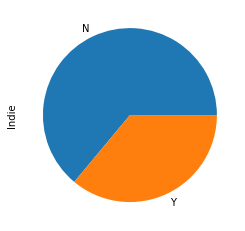

In [12]:
esrb['Indie'].value_counts().plot.pie()

So, not a large amount, as expected. However, larger than I would have guessed! Let's dive into that some more...

In [13]:
# Let's take a look at the indie games that DO have an ESRB rating. See if we recognize any of them.
ind = esrb.copy()
ind = ind.loc[ind['Indie'] == 'Y']
ind['Title'].head(n=15)

31        ARK: Survival Evolved
58               Stardew Valley
72               Risk of Rain 2
73               Rocket League®
81     The Jackbox Party Pack 6
91                  Gang Beasts
92                Hollow Knight
97                   Subnautica
107      Golf With Your Friends
109                We Happy Few
117    The Jackbox Party Pack 3
123                     Cuphead
139    The Jackbox Party Pack 4
144              Slay the Spire
146                   Wreckfest
Name: Title, dtype: object

Okay, this is beginning to make more sense now. Apparently, the Genre tag of Indie, is very much open for interpretation! I know Rocket League is made by Psyonix. I would struggle to describe Psyonix as an indie developer. I suppose there needs to be a definition of what makes a developer an "Indie" developer, at this point.

Alright, in Googling the topic, I found that there is not an "official" definition. However, the main focus is on monetary support by the developers, from a publisher of some sort. This would make sense for all of these games, really. They started out with a handfull of developers, and made a popular game. That can be said of all of these titles. Psyonix is now large, but their first game came out on the Playstation 3, several years ago. The predecessor to Rocket League (which was identical in concept, but different in execution) was titled... Ready for this?... Supersonic Acrobatic Rocket-Powered Battle-Cars.

Despite the horrible older game's title, they revamped it, made it for a new era, and delivered the simpler-titled sequel, Rocket League, sometime in 2015. The game was a massive success, earning Psyonix a buyout from Epic Games, the studio that owns the popular game Fortnite. I'm guessing they haven't removed the genre tag, since Psyonix was "picked up" from Epic games, and was released as an Indie title in the monetary focused definition.

Alright, that's enough deep diving into this area. Moving on...

Let's take a look at the average positive review percentage, based off of the ESRB ratings.

In [14]:
esrb.groupby('ESRB', as_index=False)['PCT_Pos_Rev'].mean()

,ESRB,PCT_Pos_Rev
0,ao,78.000000
1,e,83.922222
2,e10,83.726852
3,ec,NaN
4,m,80.813953
5,rp,65.000000
6,t,81.810547


Nothing shocking here. The fluctuation here is minimal at best. Looks like Early Childhood (EC) ratings are all null in that column. This, kind of, makes sense. Steam is on PC. PC's, and the games you can play on them, are usually not available to kids who are that early into their development. Rating Pending (RP) seems a little odd though. I'm gonna guess that there are very few titles in any of the categories that average out to an exact integer, making the Adults Only (AO) value just as suspicious. Let's take a look.

In [15]:
adon = esrb.copy()
adon = adon.loc[adon['ESRB'] == 'ao']
adon[['ESRB','Title','PCT_Pos_Rev','Total_Rev']]

,ESRB,Title,PCT_Pos_Rev,Total_Rev
2631,ao,Hatred,78.0,7574.0
8179,ao,Perfect Crime,NaN,NaN


In [16]:
rpend = esrb.copy()
rpend = rpend.loc[rpend['ESRB'] == 'rp']
rpend[['ESRB','Title','PCT_Pos_Rev','Total_Rev']]

,ESRB,Title,PCT_Pos_Rev,Total_Rev
3106,rp,Comanche,NaN,NaN
4047,rp,A Mortician's Tale,65.0,404.0
6435,rp,EDEN STAR,NaN,NaN
11193,rp,Oniken: Unstoppable Edition,NaN,NaN
13274,rp,SKIPCHASER,NaN,NaN


Exactly what I suspected. A bunch of games I've never heard of, and only 1 actual Review score for each. Lastly, let's take a look at the ESRBWhy categories, and see what common phrases pop up in the various ratings being given.

In [17]:
# let's first see how many titles are in each rating category.
esrb['ESRB'].value_counts()

t      1005
m       701
e10     476
e       320
rp        5
ao        2
ec        1
Name: ESRB, dtype: int64

In [18]:
# Breakout of the top 4 should be the focus, so let's break out the ESRB data by those 4 ratings specifically.
options = ['t','m','e10','e'] 
esrb4 = esrb.copy()
esrb4 = esrb4.loc[esrb4['ESRB'].isin(options)]

In [19]:
# Now let's Remove all unnecessary columns
esrb5 = esrb4.iloc[: , 6:26].copy()
esrb5.drop('ESRBWhy',axis=1,inplace=True)
esrb5.head(2)

,ESRB,Violence,Blood,Language,Mild,Alcohol,Suggestive,Sexual,Strong,Fantasy,Gore,Drug,Nudity,Tobacco,Intense,Partial,Humor,Crude,Title
0,m,Y,Y,N,N,N,N,N,N,N,Y,N,N,N,Y,N,N,N,DOOM Eternal
2,m,Y,Y,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,Halo: The Master Chief Collection


In [20]:
# Next, lets convert these values into binary 1's and 0's for easier aggregation later.
for col in esrb5.iloc[: , 1:18]:
    esrb5[col] = esrb5[col].map({'Y': 1, 'N': 0})

In [21]:
# Verify that the conversion worked
esrb5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2502 entries, 0 to 15572
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ESRB        2502 non-null   object
 1   Violence    2502 non-null   int64 
 2   Blood       2502 non-null   int64 
 3   Language    2502 non-null   int64 
 4   Mild        2502 non-null   int64 
 5   Alcohol     2502 non-null   int64 
 6   Suggestive  2502 non-null   int64 
 7   Sexual      2502 non-null   int64 
 8   Strong      2502 non-null   int64 
 9   Fantasy     2502 non-null   int64 
 10  Gore        2502 non-null   int64 
 11  Drug        2502 non-null   int64 
 12  Nudity      2502 non-null   int64 
 13  Tobacco     2502 non-null   int64 
 14  Intense     2502 non-null   int64 
 15  Partial     2502 non-null   int64 
 16  Humor       2502 non-null   int64 
 17  Crude       2502 non-null   int64 
 18  Title       2502 non-null   object
dtypes: int64(17), object(2)
memory usage: 390.9+ KB

In [22]:
esrb5.groupby('ESRB').mean().round(4)*100

,Violence,Blood,Language,Mild,Alcohol,Suggestive,Sexual,Strong,Fantasy,Gore,Drug,Nudity,Tobacco,Intense,Partial,Humor,Crude
ESRB,,,,,,,,,,,,,,,,,
e,72.19,3.44,6.56,63.44,10.62,1.25,0.00,0.00,35.62,0.00,0.00,0.00,5.31,0.00,0.00,2.19,2.19
e10,91.81,15.76,24.79,45.38,17.44,11.34,0.00,0.00,63.24,0.21,0.84,0.00,9.03,0.00,0.00,7.56,7.77
m,94.44,92.72,69.90,3.00,10.56,9.99,32.24,57.06,1.00,50.64,21.11,18.69,2.14,38.09,12.55,3.42,2.00
t,91.54,55.52,43.28,38.71,20.10,27.26,7.16,0.20,18.91,5.57,6.67,7.56,10.35,0.00,7.96,7.86,7.56


The data above, is the numbers above are averages for each of the times that a Yes appears, for the ESRBWhy column's breakout values. Not a surprise, that most games have violence of some sort, and the rest of the columns make sense as to why they might have higher or lower average counts that determine the ESRB rating. I think the more interesting keywords are Partial, Intense, and Strong. These 3 seemed to be tags that definitely lead to the Mature rating, more than the rest. The remaining words are actual descriptors, while the intensity of the descriptors is what actually seems to more accurately depict the rating. If the word Strong is used as a descriptor, it's around a 57% chance that the game is rated M.

While we could go further down this rabbit hole, moving onto some other EDA seems more appropriate for now. Lets move on to looking at some other breakouts of the games, based off of ESRB ratings.

In [23]:
# What's the highest priced game(s) on the list, after removal of anything without an ESRBWhy value?
print('Game: ',esrb.loc[esrb['Price'].idxmax()])

Game:  PCT_Pos_Rev                                                             94
Total_Rev                                                            24933
Developer_Count                                                          1
Developer_Primary                                               CAPCOM Co.
Publisher_Count                                                          1
Publisher_Primary                                               CAPCOM Co.
ESRB                                                                     m
ESRBWhy                  Blood| Partial Nudity| Strong Language| Violen...
Violence                                                                 Y
Blood                                                                    Y
Language                                                                 Y
Mild                                                                     N
Alcohol                                                                  N
Suggestive        

Fans of the game series "Devil May Cry," are probably wondering why the 5th game in the series is listed at this price. This is, most likely, a variation of the game that wound up being special in some way. Something like the "Collectors Edition" version of the game, or something along those lines. More than likely, this game has a singular entry somewhere, that is for the "vanilla" game, without the special edition. It is also possible that this game was the first Game_ID listed in a bundle of games, and was kept as the original game. This is an issue that would need fixing, if I had the time to do so.

<AxesSubplot:>

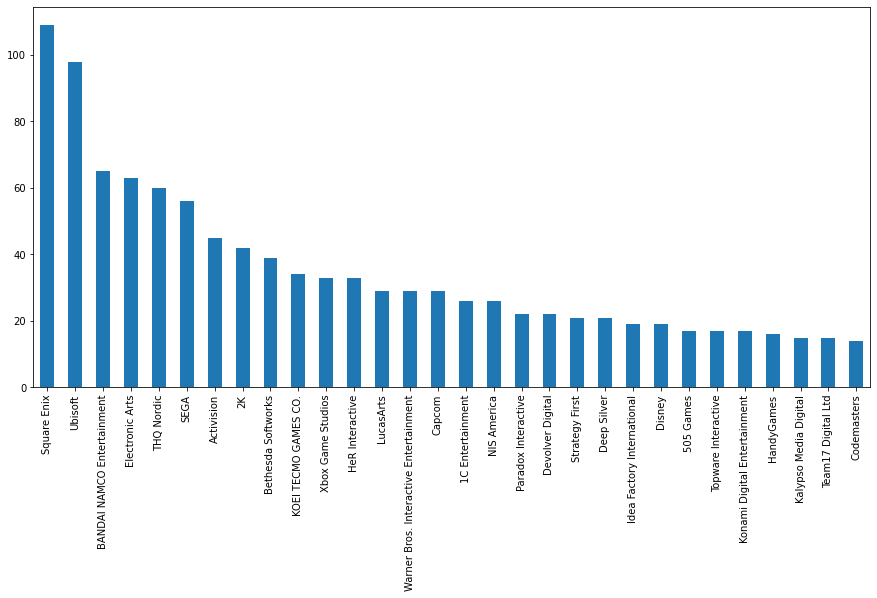

In [24]:
# Which Publishers have the most titles in the list?
plt.subplots(figsize=(15,7))
esrb['Publisher_Primary'].value_counts().nlargest(30).plot.bar()

<AxesSubplot:>

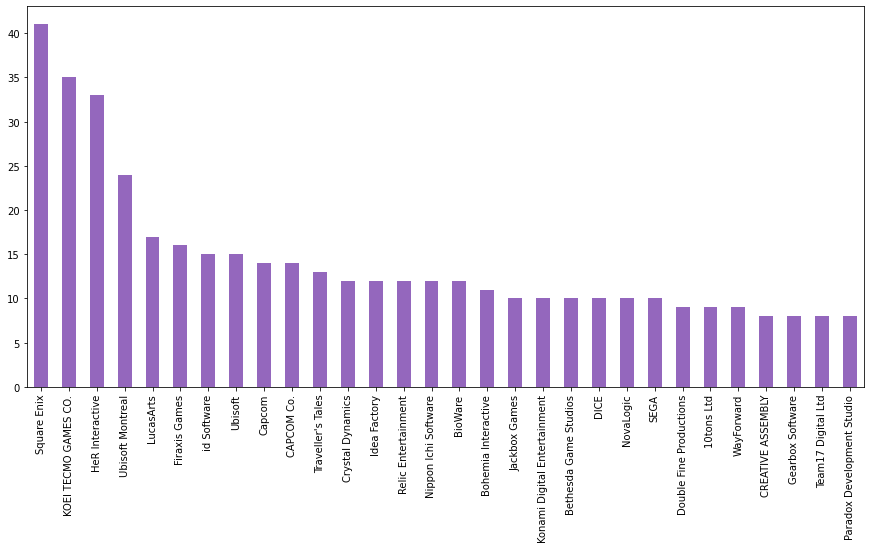

In [25]:
# Developers?
plt.subplots(figsize=(15,7))
esrb['Developer_Primary'].value_counts().nlargest(30).plot.bar(color=['C4'])

Square Enix seems to be a pretty heavy user of ESRB ratings. Let's take a look at them specifically. I know they are a developer/publisher of Final Fantasy series, as well as many other series of games. That said, let's focus on their Franchise column specifically.

<AxesSubplot:>

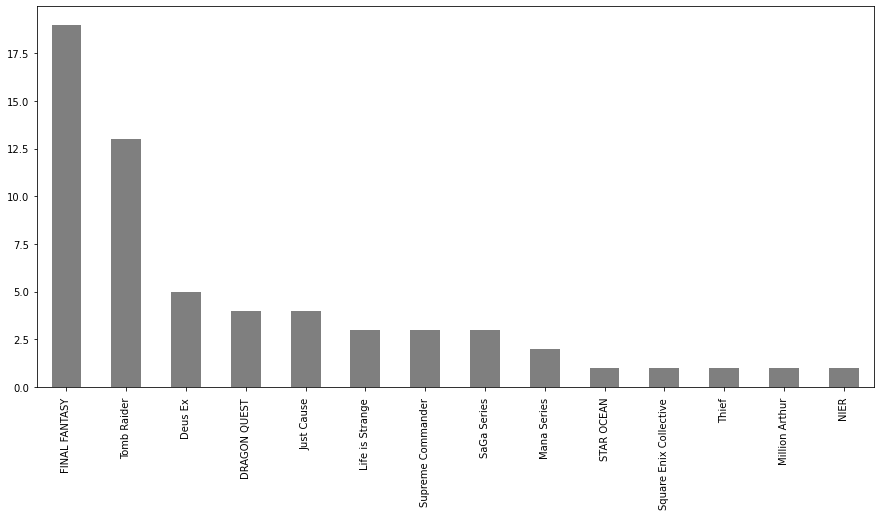

In [26]:
se = esrb.copy()
se = se.loc[se['Publisher_Primary'] == 'Square Enix']
plt.subplots(figsize=(15,7))
se['Franchise'].value_counts().nlargest(30).plot.bar(color=['C7'])

Whew! I didn't know they had 17+ games in their FF series! Suppose there are several "extensions" of various entries in the series though. Tomb Raider Franchise also appears to be a popular series as well. Not sure if those are only the newer versions of Tomb Raider, or if they have a bunch of remakes of the old series from the playstation though.

Alright, now that we've jumped in on ESRB, let's take a look at some of the other breakouts, and see what we can find.

In [27]:
genre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15726 entries, 0 to 15725
Data columns (total 45 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PCT_Pos_Rev            4181 non-null   float64
 1   Total_Rev              4181 non-null   float64
 2   Developer_Count        15726 non-null  int64  
 3   Developer_Primary      15726 non-null  object 
 4   Publisher_Count        15726 non-null  int64  
 5   Publisher_Primary      15721 non-null  object 
 6   ESRB                   3391 non-null   object 
 7   ESRBWhy                2510 non-null   object 
 8   Violence               15726 non-null  object 
 9   Blood                  15726 non-null  object 
 10  Language               15726 non-null  object 
 11  Mild                   15726 non-null  object 
 12  Alcohol                15726 non-null  object 
 13  Suggestive             15726 non-null  object 
 14  Sexual                 15726 non-null  object 
 15  St

In [28]:
# Let's investigate our data, and make sure we don't have any games that have
# an "N" for ALL genre tags that we're interested in. Those could be items that
# skew our data again. First, lets make a copy of the data, and remove unnecessary columns.
gen_f1 = genre.copy()
gen_f1 = gen_f1.iloc[: , 25:39].copy()
gen_f1.head()

,Title,Genre,Action,Adventure,Casual,Early Access,Free to Play,Indie,Massively Multiplayer,Racing,RPG,Simulation,Sports,Strategy
0,DOOM Eternal,Action,Y,N,N,N,N,N,N,N,N,N,N,N
1,Dota 2,"Action, Free to Play, Strategy",Y,N,N,N,Y,N,N,N,N,N,N,Y
2,Halo: The Master Chief Collection,Action,Y,N,N,N,N,N,N,N,N,N,N,N
3,Red Dead Redemption 2,"Action, Adventure",Y,Y,N,N,N,N,N,N,N,N,N,N
4,Borderlands 3,"Action, RPG",Y,N,N,N,N,N,N,N,Y,N,N,N


In [29]:
# First check: see if anything is blank in the Genre column
gen_f2 = gen_f1.copy().loc[gen_f1['Genre'] == '']
gen_f2

,Title,Genre,Action,Adventure,Casual,Early Access,Free to Play,Indie,Massively Multiplayer,Racing,RPG,Simulation,Sports,Strategy


In [30]:
# Alright, zero results for the first check. let's check one more thing...
# Second check: see if any rows have ALL N's for the Genre tag types.
# first step here, is to convert the Y's and N's into 1's and 0's again.
gen_f3 = gen_f1.copy()
for col in gen_f3.iloc[: , 2:14]:
    gen_f3[col] = gen_f3[col].map({'Y': 1, 'N': 0})

In [31]:
# Verify that the loop worked
gen_f3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15726 entries, 0 to 15725
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Title                  15726 non-null  object
 1   Genre                  15726 non-null  object
 2   Action                 15726 non-null  int64 
 3   Adventure              15726 non-null  int64 
 4   Casual                 15726 non-null  int64 
 5   Early Access           15726 non-null  int64 
 6   Free to Play           15726 non-null  int64 
 7   Indie                  15726 non-null  int64 
 8   Massively Multiplayer  15726 non-null  int64 
 9   Racing                 15726 non-null  int64 
 10  RPG                    15726 non-null  int64 
 11  Simulation             15726 non-null  int64 
 12  Sports                 15726 non-null  int64 
 13  Strategy               15726 non-null  int64 
dtypes: int64(12), object(2)
memory usage: 1.7+ MB


In [32]:
# Next, we sum the binary values of the Y/N results. If the sum = 0, we have an issue.
gen_f3['SumGenres'] = gen_f3.iloc[:, 2:14].sum(axis=1)
gen_f3.loc[gen_f3['SumGenres'] == 0]

,Title,Genre,Action,Adventure,Casual,Early Access,Free to Play,Indie,Massively Multiplayer,Racing,RPG,Simulation,Sports,Strategy,SumGenres


Twice, we have proven that the Genre tags are, pretty much, always present in the game data from Steam. Now let's take a deeper dive into the results, and see what we can discover.

In [33]:
# What game Genre tags have the highest average Prices?
gen_pr1 = genre.copy()
for col in gen_pr1.iloc[: , 27:39]:
    gen_pr = gen_pr1.loc[gen_pr1[col] == 'Y']
    print('$',gen_pr['Price'].mean().round(2),' --> ',col,sep='')


$11.7 --> Action
$10.9 --> Adventure
$7.41 --> Casual
$13.03 --> Early Access
$0.63 --> Free to Play
$9.19 --> Indie
$7.47 --> Massively Multiplayer
$13.15 --> Racing
$12.24 --> RPG
$12.51 --> Simulation
$14.29 --> Sports
$12.03 --> Strategy


Above view is okay, but it's not great for comparing via visualizations. Let's spice it up, and turn it into a dataframe instead. Once we do that, we can actually view everything as a simple bar chart.

In [34]:
# create an empty dataframe with our two columns we want to use as x and y.
colnames = ['Genre','Avg Price']
gen_pravg = pd.DataFrame(columns=colnames)

# perform the same loop as above, but this time fill in our new dataframe with the values we printed earlier.
for col in gen_pr1.iloc[: , 27:39]:
    gen_pr = gen_pr1.loc[gen_pr1[col] == 'Y']
    gen_pravg.loc[len(gen_pravg)] = [col,gen_pr['Price'].mean().round(2)]

<AxesSubplot:xlabel='Genre'>

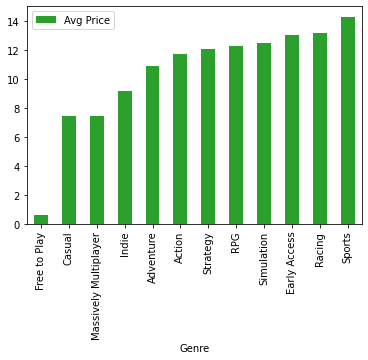

In [35]:
# Now sort them, and push into a quick bar chart visualization.
gen_pravg.sort_values(by='Avg Price',inplace=True)
gen_pravg.plot.bar(x='Genre',y='Avg Price',rot=90,color=['C2'])

Nothing terribly exciting here, honestly. This tells me a little bit about the cost by genre, but not enough to warrant a strong connection that might be unexpected. Massive Multiplayer tag is probably combined heavily with the "Free to Play" tag, which is why it's at the price average of half of what a usual monthly payment to play the game is (~$15/month). The rest of the games don't seem to have enough of a price gap to warrant any noticeable Genre tag causing a deep change. Genre is another area that we could deep dive into, for several hours. For now, lets move on to the developer and publisher focused data sets.

<AxesSubplot:>

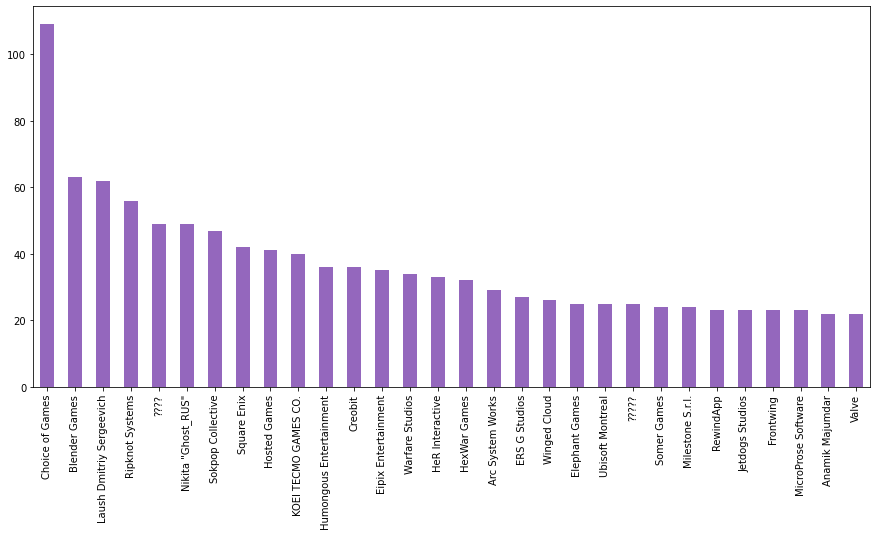

In [36]:
# Which developers/publishers have the most titles under their belts
plt.subplots(figsize=(15,7))
devpub['Developer_Primary'].value_counts().nlargest(30).plot.bar(color=['C4'])

Wow! Choice of Games, I had never even heard of. After going to their developer page on Steam, they have 116 games available! Choice of Games specializes in making text based games. This means they, probably, have a shorter turnaround time for the development process. None of their games are anything that I've heard of, which says a lot about the popularity of their game types. So, in reviewing these developers further, I'm going to guess that I will not have heard of most of the games they've made. Aside form Square Enix and KOEI TECMO, I don't recognize any of these developer studios. Looking at the Developer counts, may not wield us any useful insights, at this point, other than the idea that we don't know the developers of games as well as we should, maybe?

After looking at a few of the ones I haven't heard of, it is clear that there may be some saturation of game developers who are specializing in less popular types of games still. The top 3 developers in this list, seemed to be making games with a "quick and dirty" approach. These developers churned out a bunch of "no-name" games that are not popular on Steam, all of which had low prices.

<AxesSubplot:>

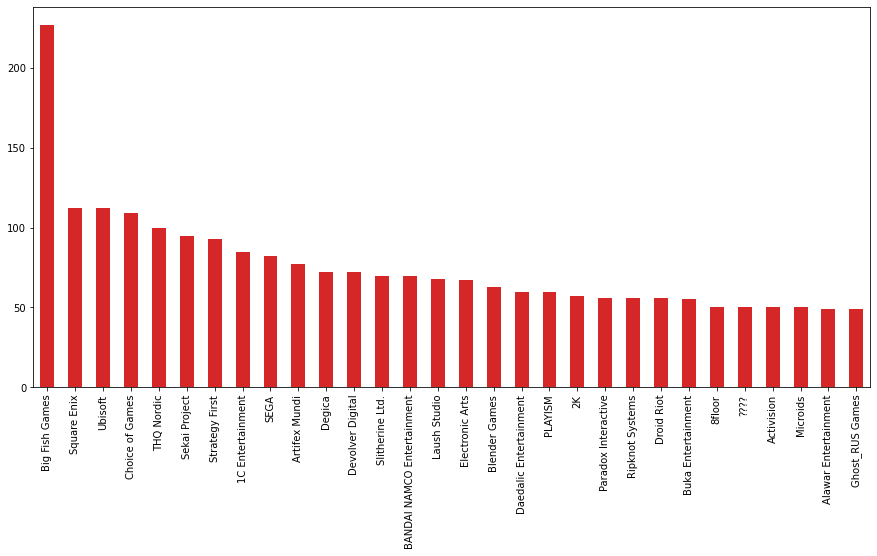

In [37]:
# Lets take a look at publishers now instead.
plt.subplots(figsize=(15,7))
devpub['Publisher_Primary'].value_counts().nlargest(30).plot.bar(color=['C3'])

These Publishers are much more familiar to me, which says a lot about the game industry, sadly. Developer studios get far less promotion for their games than the Publishers do. Big Fish Games, in the number 1 spot here, was not a Publisher I'd heard of. Their games are still not popular titles that are mainstream, but their prices are higher than the odd developers we saw in the Developer focus. They are "the largest publisher of Hidden Object games," according to their About page on Steam. I did not know that "Hidden Object games" were a type of game even!

At any rate, we've got the top names in gaming all over this list. Ubisoft, Square Enix, THQ, Sega, Devolver, Bandai, and a slew of others. I thought that we'd see a few more big names here, but I'm gonna guess that the saturation of Developers is also plaguing the list of games from this viewpoint as well. If we had sales data, we could probably look at that, as a much bigger "tell" of which publishers and developers are truly mainstream. We may be able to discern the quality of a publisher or developer, based off of these factors though.

For now, let's break away from EDA, and focus on the next subject here, where we can take a stab at finding correlations and then attempting to make some prediction models. First up, let's see if we can find any correlations in the data, that help predict the percentage of positive reviews (PCT_Pos_Rev).

In [38]:
revs = gms2.copy()
revs = revs[revs['PCT_Pos_Rev'].notna()]
revs['FinalReleaseDt'] = pd.to_datetime(revs['FinalReleaseDt'])
# Create a new column that contains (days since release date as DSRD)
revs['DSRD'] = pd.Timestamp.now().floor('d') - revs['FinalReleaseDt']
revs['DSRD'] = revs['DSRD'].astype('timedelta64[D]').astype(int)
revs.head(3)

,PCT_Pos_Rev,Total_Rev,Developer_Count,Developer_Primary,Publisher_Count,Publisher_Primary,ESRB,ESRBWhy,Violence,Blood,...,Simulation,Sports,Strategy,Franchise,Franchise_YN,Franchise_Count,Price,Purchase_Options,FinalReleaseDt,DSRD
0,85.0,59927.0,1,id Software,1,Bethesda Softworks,m,Blood and Gore| Intense Violence,Y,Y,...,N,N,N,DOOM,Y,9.0,59.99,3,2020-03-19,145
1,84.0,1333619.0,1,Valve,1,Valve,NaN,NaN,N,N,...,N,N,Y,NaN,N,NaN,0.00,2,2013-07-09,2590
2,91.0,86340.0,5,343 Industries,1,Xbox Game Studios,m,Blood and Gore| Violence| Language,Y,Y,...,N,N,N,Halo,Y,1.0,39.99,2,2019-12-03,252


In [39]:
revs = revs.drop(['ESRB',
                  'ESRBWhy',
                  'Developer_Primary',
                  'Publisher_Primary' ,
                  'Title', 
                  'Franchise',
                  'Genre',
                  'FinalReleaseDt'], axis=1)

for column in revs:
    if revs[column].dtype == object:
        revs[column] = revs[column].map({'Y': 1, 'N': 0})

In [40]:
revs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4181 entries, 0 to 15597
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PCT_Pos_Rev            4181 non-null   float64
 1   Total_Rev              4181 non-null   float64
 2   Developer_Count        4181 non-null   int64  
 3   Publisher_Count        4181 non-null   int64  
 4   Violence               4181 non-null   int64  
 5   Blood                  4181 non-null   int64  
 6   Language               4181 non-null   int64  
 7   Mild                   4181 non-null   int64  
 8   Alcohol                4181 non-null   int64  
 9   Suggestive             4181 non-null   int64  
 10  Sexual                 4181 non-null   int64  
 11  Strong                 4181 non-null   int64  
 12  Fantasy                4181 non-null   int64  
 13  Gore                   4181 non-null   int64  
 14  Drug                   4181 non-null   int64  
 15  Nud

<AxesSubplot:>

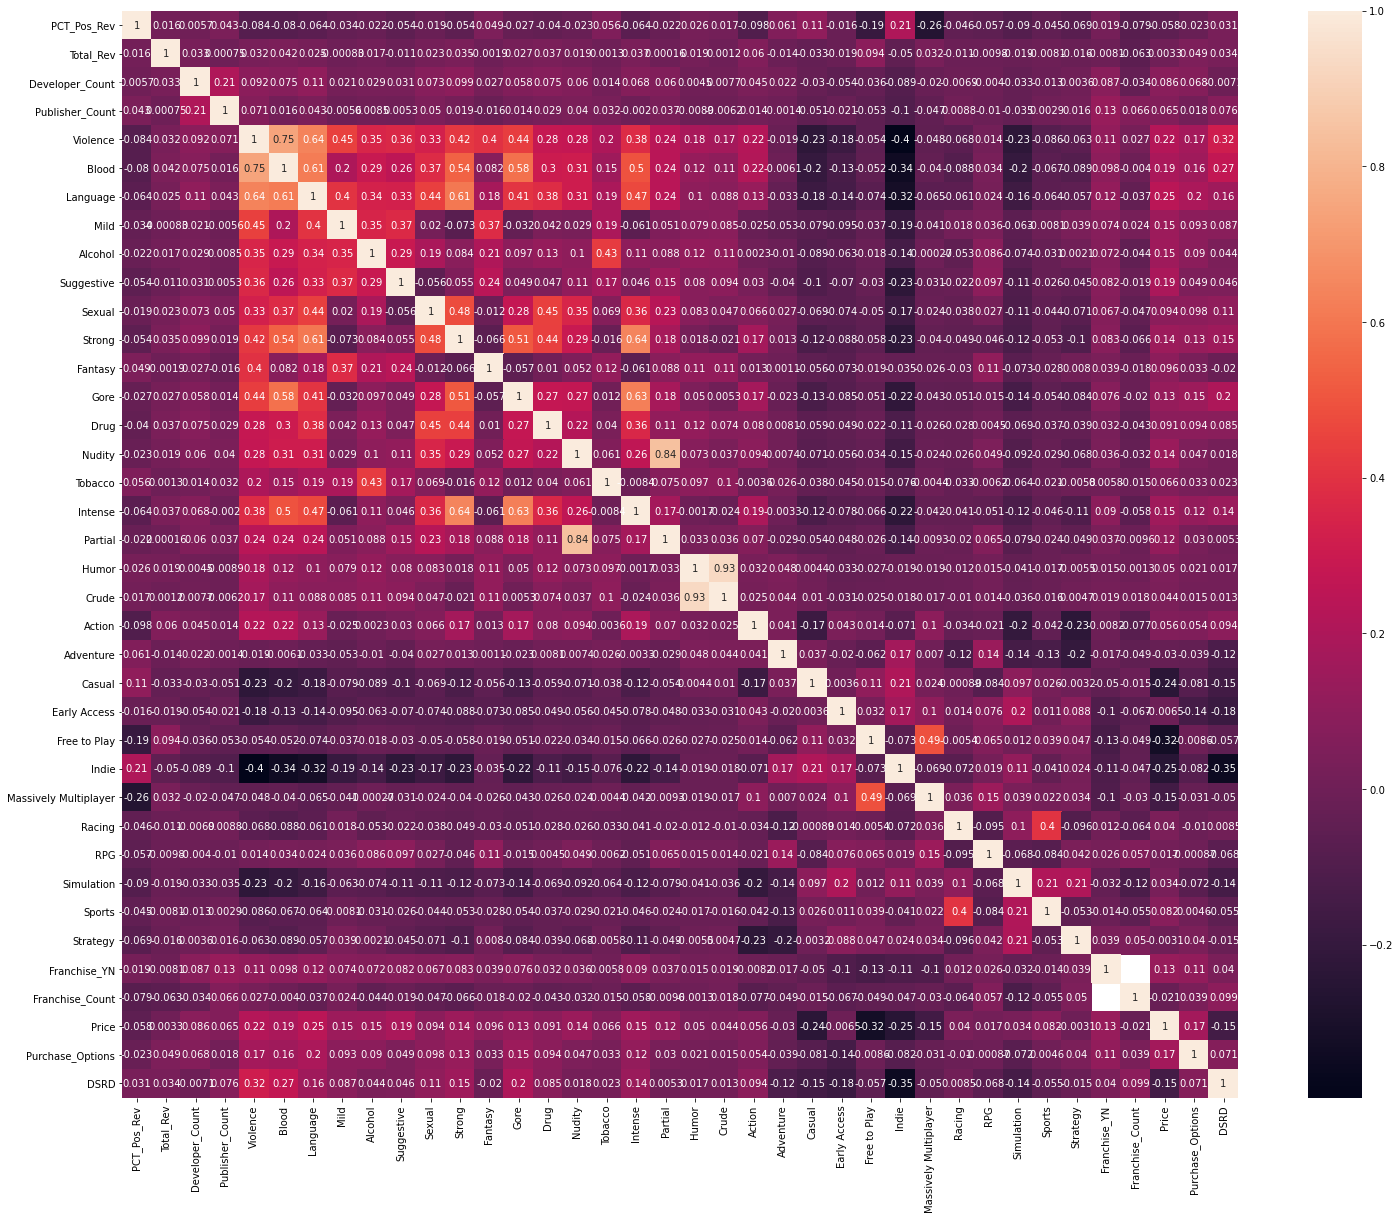

In [41]:
# sns.pairplot(revs)
# sns.heatmap(df_new.corr())
plt.subplots(figsize=(25,20))
sns.heatmap(revs.corr(), annot=True)

As you can see, the column "PCT_Pos_Rev" does not correlate well with anything, really. The highest correlation point was for the Genre tag of Indie, which was still a very low correlation, sitting at .21. However, we're going to try and see if we can still manage to find some accuracy when using a linear regression prediction model. 

In [42]:
revs2 = revs.copy()
revs = revs.drop(['Franchise_Count'], axis=1)
msk = np.random.rand(len(revs)) < .8
train = revs[msk]
test = revs[~msk]
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3321 entries, 0 to 15597
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PCT_Pos_Rev            3321 non-null   float64
 1   Total_Rev              3321 non-null   float64
 2   Developer_Count        3321 non-null   int64  
 3   Publisher_Count        3321 non-null   int64  
 4   Violence               3321 non-null   int64  
 5   Blood                  3321 non-null   int64  
 6   Language               3321 non-null   int64  
 7   Mild                   3321 non-null   int64  
 8   Alcohol                3321 non-null   int64  
 9   Suggestive             3321 non-null   int64  
 10  Sexual                 3321 non-null   int64  
 11  Strong                 3321 non-null   int64  
 12  Fantasy                3321 non-null   int64  
 13  Gore                   3321 non-null   int64  
 14  Drug                   3321 non-null   int64  
 15  Nud

In [43]:
x_train = train.iloc[:,1:37]
x_test = test.iloc[:,1:37]

y_train = train['PCT_Pos_Rev']
y_test = test['PCT_Pos_Rev']

x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3321 entries, 0 to 15597
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Total_Rev              3321 non-null   float64
 1   Developer_Count        3321 non-null   int64  
 2   Publisher_Count        3321 non-null   int64  
 3   Violence               3321 non-null   int64  
 4   Blood                  3321 non-null   int64  
 5   Language               3321 non-null   int64  
 6   Mild                   3321 non-null   int64  
 7   Alcohol                3321 non-null   int64  
 8   Suggestive             3321 non-null   int64  
 9   Sexual                 3321 non-null   int64  
 10  Strong                 3321 non-null   int64  
 11  Fantasy                3321 non-null   int64  
 12  Gore                   3321 non-null   int64  
 13  Drug                   3321 non-null   int64  
 14  Nudity                 3321 non-null   int64  
 15  Tob

In [44]:
lm = linear_model.LinearRegression()
model = lm.fit(x_train,y_train)
predictions = lm.predict(x_test)

In [45]:
pred = pd.DataFrame(predictions)
pred.columns = ['RevPredicted']
revs3 = x_test.join(y_test)
revs3 = revs3.join(pred)
revs3['Review_Diff'] = revs3['RevPredicted'] - revs3['PCT_Pos_Rev'] 
revs3.head()

,Total_Rev,Developer_Count,Publisher_Count,Violence,Blood,Language,Mild,Alcohol,Suggestive,Sexual,...,Simulation,Sports,Strategy,Franchise_YN,Price,Purchase_Options,DSRD,PCT_Pos_Rev,RevPredicted,Review_Diff
1,1333619.0,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0.00,2,2590,84.0,82.769917,-1.230083
2,86340.0,5,1,1,1,1,0,0,0,0,...,0,0,0,1,39.99,2,252,91.0,188.946046,97.946046
9,4562019.0,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0.00,2,2912,87.0,80.548437,-6.451563
18,130856.0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,59.99,1,1460,61.0,86.014242,25.014242
24,62929.0,7,1,1,1,1,0,0,0,1,...,0,0,0,1,59.99,5,676,88.0,78.340831,-9.659169


In [46]:
def GetModelInfo(ytest, predvals, predname, diffname, dafra):
    print(f'Mean squared error (closer to 0 is better): {mean_squared_error(ytest, predvals)}')
    print(f'r2 score (1 is perfect): {r2_score(ytest, predvals)}')

    predcol = dafra[predname]
    diffcol = dafra[diffname]

    plt.figure(figsize=(16, 6))
    plt.ylim(diffcol.min(), diffcol.max())
    plt.xlim(predcol.min(),predcol.max())
    sns.scatterplot(x=predname, y=diffname, data=dafra)

    X_plot = np.linspace(predcol.min(),predcol.max(), 10)
    Y_plot = np.linspace(0, 0, 10)

    plt.plot(X_plot, Y_plot, color='r')

Mean squared error (closer to 0 is better): 140.65011113112897
r2 score (1 is perfect): 0.03882954016692275


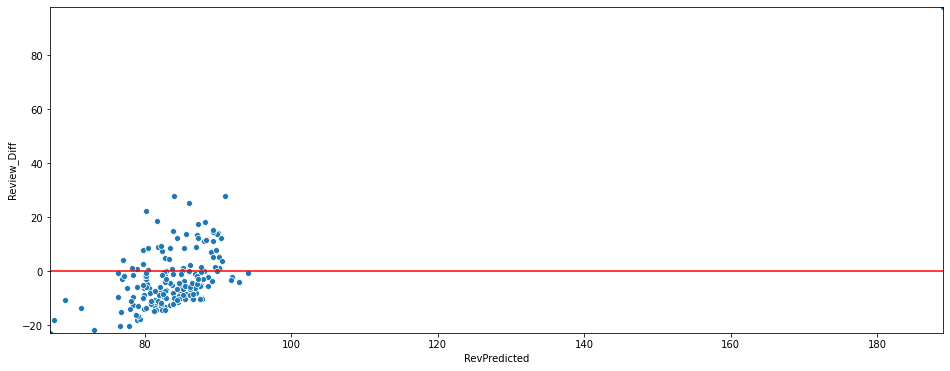

In [47]:
GetModelInfo(y_test,pred,'RevPredicted','Review_Diff',revs3)

In [48]:
prc = gms2.copy()

prc['FinalReleaseDt'] = pd.to_datetime(prc['FinalReleaseDt'])
# Create the days since release date column again (DSRD)
prc['DSRD'] = pd.Timestamp.now().floor('d') - prc['FinalReleaseDt']
prc['DSRD'] = prc['DSRD'].astype('timedelta64[D]').astype(int)

prc = prc.drop(['PCT_Pos_Rev',
                'Total_Rev',
                'ESRB',
                'ESRBWhy',
                'Developer_Primary',
                'Publisher_Primary' ,
                'Title', 
                'Franchise',
                'Genre',
                'FinalReleaseDt'], axis=1)

for column in prc:
    if prc[column].dtype == object:
        prc[column] = prc[column].map({'Y': 1, 'N': 0})

<AxesSubplot:>

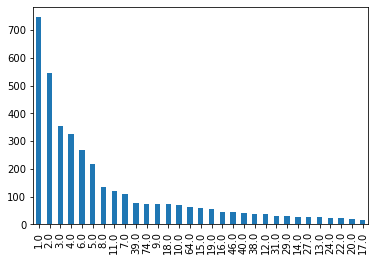

In [49]:
prc['Franchise_Count'].value_counts().plot.bar()

In [50]:
prc['Franchise_Count'].head(5)

0    9.0
1    NaN
2    1.0
3    1.0
4    4.0
Name: Franchise_Count, dtype: float64

In [51]:
values = {'Franchise_Count': 0}
prc = prc.fillna(value=values)
prc['Franchise_Count'].head(5)

0    9.0
1    0.0
2    1.0
3    1.0
4    4.0
Name: Franchise_Count, dtype: float64

<AxesSubplot:>

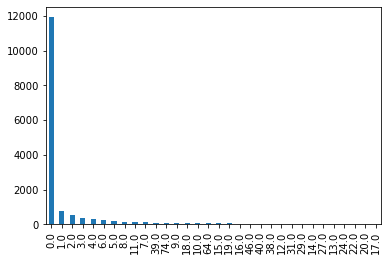

In [52]:
prc['Franchise_Count'].value_counts().plot.bar()

In [53]:
prc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15726 entries, 0 to 15725
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Developer_Count        15726 non-null  int64  
 1   Publisher_Count        15726 non-null  int64  
 2   Violence               15726 non-null  int64  
 3   Blood                  15726 non-null  int64  
 4   Language               15726 non-null  int64  
 5   Mild                   15726 non-null  int64  
 6   Alcohol                15726 non-null  int64  
 7   Suggestive             15726 non-null  int64  
 8   Sexual                 15726 non-null  int64  
 9   Strong                 15726 non-null  int64  
 10  Fantasy                15726 non-null  int64  
 11  Gore                   15726 non-null  int64  
 12  Drug                   15726 non-null  int64  
 13  Nudity                 15726 non-null  int64  
 14  Tobacco                15726 non-null  int64  
 15  In

There we go. Nice clean data set of 15.7k rows. Now, let's see if we can find any correlations.

<AxesSubplot:>

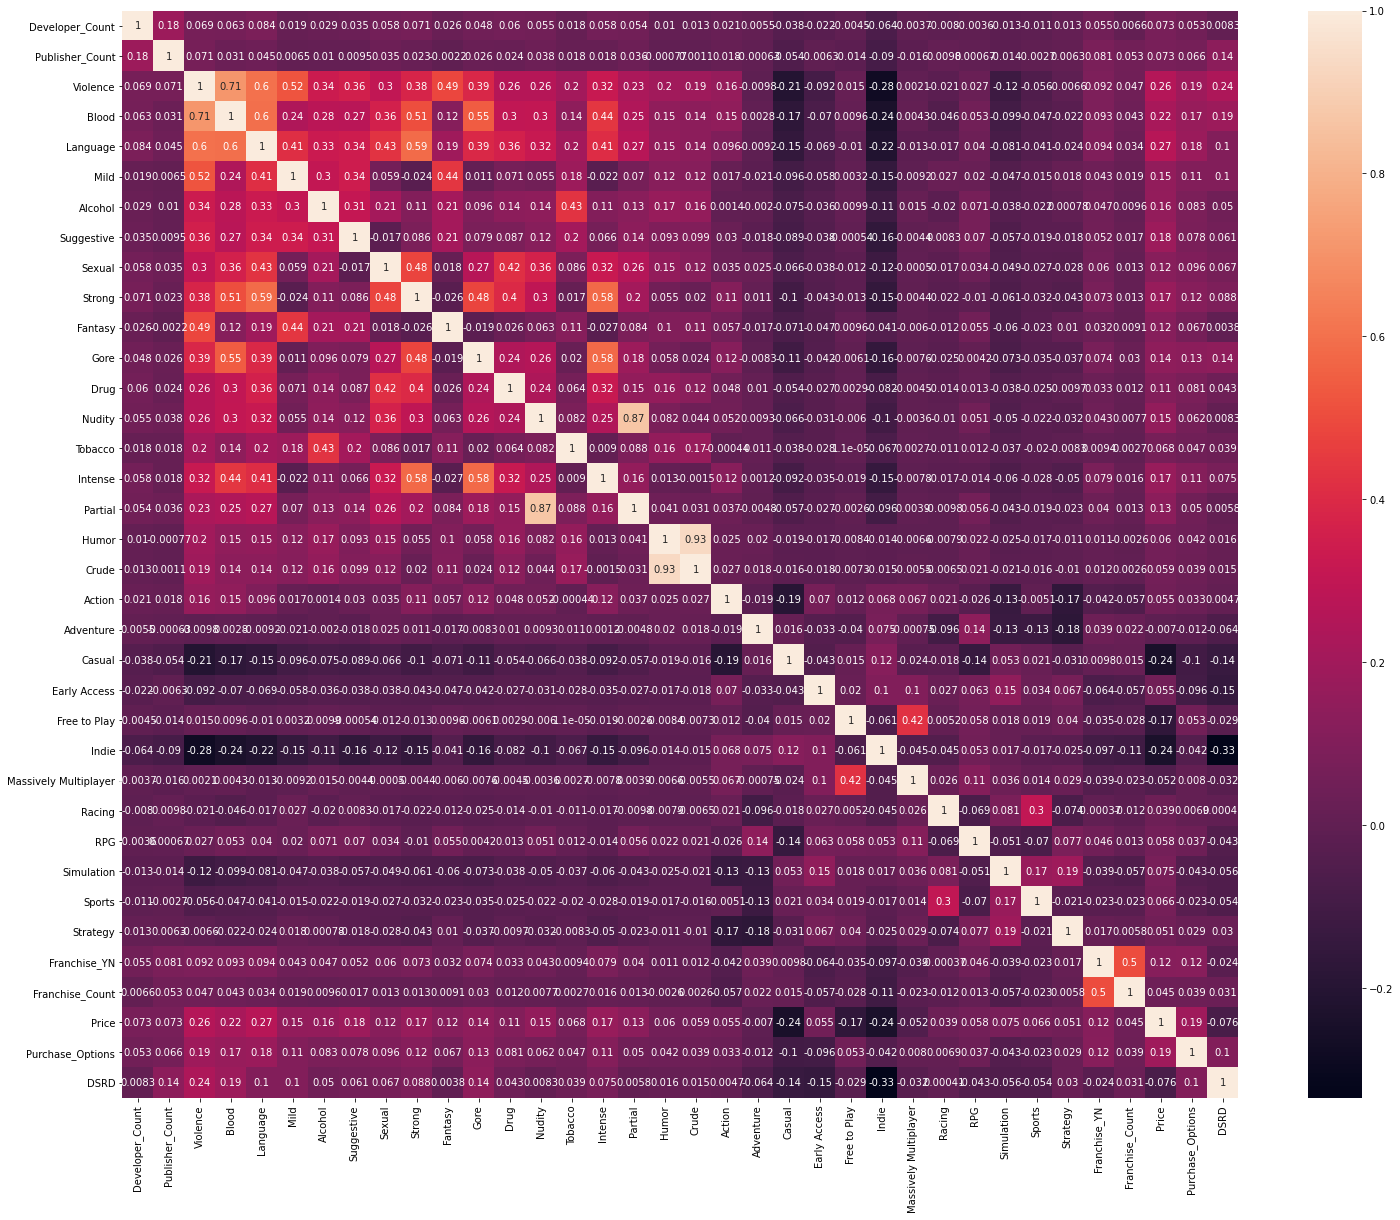

In [54]:
plt.subplots(figsize=(25,20))
sns.heatmap(prc.corr(), annot=True)

Welp, not so good correlation for the Price column either. At least for this column, we have a stronger correlation based off of a few of the ESRB values. I would wager that this is occurring because the companies that are actually popular enough to feel it necessary to obtain the ESRB ratings, generally have a popular product. Popular product equals more expensive product in this sense as well. At any rate, let's see what a linear model can get for us, with this data.

In [55]:
prc_col = prc['Price']
prc.drop(labels=['Price'], axis=1,inplace = True)
prc.insert(0, 'Price', prc_col)
prc.head()

,Price,Developer_Count,Publisher_Count,Violence,Blood,Language,Mild,Alcohol,Suggestive,Sexual,...,Massively Multiplayer,Racing,RPG,Simulation,Sports,Strategy,Franchise_YN,Franchise_Count,Purchase_Options,DSRD
0,59.99,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,9.0,3,145
1,0.00,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0.0,2,2590
2,39.99,5,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,1,1.0,2,252
3,59.99,1,1,1,1,1,0,1,0,1,...,0,0,0,0,0,0,1,1.0,3,250
4,59.99,1,1,1,1,1,0,0,0,1,...,0,0,1,0,0,0,1,4.0,4,151


In [56]:
msk = np.random.rand(len(prc)) < .8
train = prc[msk]
test = prc[~msk]
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12605 entries, 0 to 15725
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Price                  12605 non-null  float64
 1   Developer_Count        12605 non-null  int64  
 2   Publisher_Count        12605 non-null  int64  
 3   Violence               12605 non-null  int64  
 4   Blood                  12605 non-null  int64  
 5   Language               12605 non-null  int64  
 6   Mild                   12605 non-null  int64  
 7   Alcohol                12605 non-null  int64  
 8   Suggestive             12605 non-null  int64  
 9   Sexual                 12605 non-null  int64  
 10  Strong                 12605 non-null  int64  
 11  Fantasy                12605 non-null  int64  
 12  Gore                   12605 non-null  int64  
 13  Drug                   12605 non-null  int64  
 14  Nudity                 12605 non-null  int64  
 15  To

In [57]:
x_train = train.iloc[:,1:36]
x_test = test.iloc[:,1:36]

y_train = train['Price']
y_test = test['Price']

x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12605 entries, 0 to 15725
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Developer_Count        12605 non-null  int64  
 1   Publisher_Count        12605 non-null  int64  
 2   Violence               12605 non-null  int64  
 3   Blood                  12605 non-null  int64  
 4   Language               12605 non-null  int64  
 5   Mild                   12605 non-null  int64  
 6   Alcohol                12605 non-null  int64  
 7   Suggestive             12605 non-null  int64  
 8   Sexual                 12605 non-null  int64  
 9   Strong                 12605 non-null  int64  
 10  Fantasy                12605 non-null  int64  
 11  Gore                   12605 non-null  int64  
 12  Drug                   12605 non-null  int64  
 13  Nudity                 12605 non-null  int64  
 14  Tobacco                12605 non-null  int64  
 15  In

In [66]:
lm = linear_model.LinearRegression()
model = lm.fit(x_train,y_train)
predictions = lm.predict(x_test)

In [68]:
pred = pd.DataFrame(predictions)
pred.columns = ['PricePredicted']
prc2 = x_test.join(y_test)
prc2 = prc2.join(pred)
prc2['Price_Diff'] = prc2['PricePredicted'] - prc2['Price'] 
prc2.head()

,Developer_Count,Publisher_Count,Violence,Blood,Language,Mild,Alcohol,Suggestive,Sexual,Strong,...,Simulation,Sports,Strategy,Franchise_YN,Franchise_Count,Purchase_Options,DSRD,Price,PricePredicted,Price_Diff
10,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0,2,90,29.99,19.332045,-10.657955
16,1,1,1,1,1,0,0,0,0,1,...,0,0,0,0,0.0,3,1519,19.99,14.636958,-5.353042
25,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0,2,915,39.99,39.345882,-0.644118
30,1,1,1,1,0,0,1,0,1,0,...,0,0,0,1,2.0,1,1384,39.99,9.224426,-30.765574
34,2,2,1,1,1,0,0,0,0,1,...,0,0,0,0,0.0,4,1741,59.99,33.164849,-26.825151


Mean squared error (closer to 0 is better): 65.625212861764
r2 score (1 is perfect): 0.2864238182843898


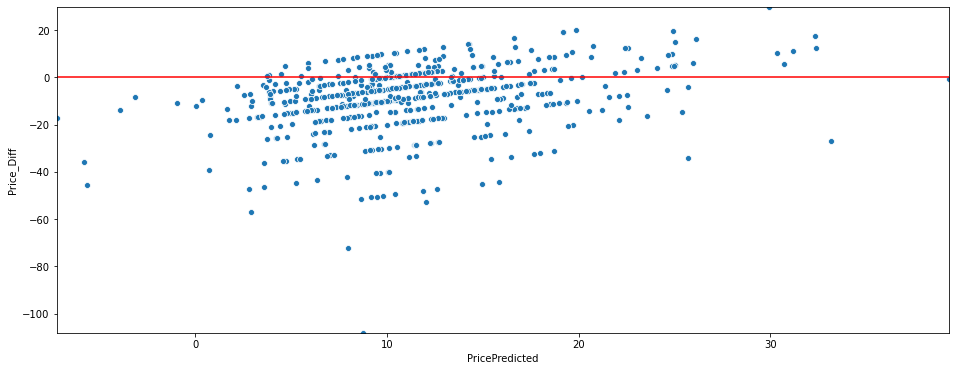

In [69]:
GetModelInfo(y_test,pred,'PricePredicted','Price_Diff',prc2)

Nothing unexpected here. Terrible accuracy and no good scores for Mean Squared Error or r-squared scores. So, Price and Genre tags aren't able to really be predicted with this dataset.

Let's take a look at the correlations that can be found, when basing the data off of specific values in differing columns. As an example, let's drill down on developers to begin with. First we'll make a list of developers, then iterate through the list, picking out each developers data. Let's see if we can come up with any commonalities that games have, based on the developer!

In [70]:
dev_brk = gms2.copy()
dev_top30 = dev_brk['Developer_Primary'].value_counts().nlargest(30).rename_axis('Developer_Primary').reset_index(name='Title_Count')

In [71]:
# dev_uniques.rename(columns={0: 'DevNm'}, inplace=True)
dev_top30.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Developer_Primary  30 non-null     object
 1   Title_Count        30 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 608.0+ bytes


In [72]:
dev_brk = dev_brk
# dev_brk = dev_brk.drop(['Purchase_Options',
#                         'Franchise_Count',  
#                         'Developer_Count', 
#                         'Publisher_Count']
#                         , axis=1)

for devo in dev_top30['Developer_Primary']:
    dtmp = dev_brk.loc[dev_brk['Developer_Primary'] == devo]
    # https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas
    corr_matrix = dtmp.corr().abs()
    # numpy.triu function returns the upper triangle of a matrix. It requires parameters which
    # tell it the number of rows, and whether you want the rows above or below the diagonal
    # center line of the matrix. np.ones is used to create an array of 1's, using the shape of
    # the resulting corr_matrix created above.
    sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                     .stack()
                     .sort_values(ascending=False))
    print('---------------------------')
    print('DEVELOPER',devo,sep=' --> ')
    print('---------------------------')
    print(sol)

---------------------------
DEVELOPER --> Choice of Games
---------------------------
Franchise_Count  Purchase_Options    0.984732
                 Price               0.859472
Price            Purchase_Options    0.083616
dtype: float64
---------------------------
DEVELOPER --> Blender Games
---------------------------
Total_Rev        Purchase_Options    1.000000
PCT_Pos_Rev      Purchase_Options    1.000000
                 Total_Rev           1.000000
Franchise_Count  Price               0.705525
Price            Purchase_Options    0.045038
Franchise_Count  Purchase_Options    0.011016
dtype: float64
---------------------------
DEVELOPER --> Laush Dmitriy Sergeevich
---------------------------
Franchise_Count  Purchase_Options    0.289642
                 Price               0.036205
Price            Purchase_Options    0.007811
dtype: float64
---------------------------
DEVELOPER --> Ripknot Systems
---------------------------
Franchise_Count  Price    1.570092e-16
dtype: float6

---------------------------
DEVELOPER --> Milestone S.r.l.
---------------------------
PCT_Pos_Rev      Franchise_Count     1.000000
Franchise_Count  Purchase_Options    1.000000
Publisher_Count  Franchise_Count     1.000000
Franchise_Count  Price               0.866025
PCT_Pos_Rev      Publisher_Count     0.576865
                 Price               0.523037
Publisher_Count  Price               0.441178
PCT_Pos_Rev      Total_Rev           0.243982
Total_Rev        Purchase_Options    0.205789
Publisher_Count  Purchase_Options    0.156293
Total_Rev        Franchise_Count     0.137253
Price            Purchase_Options    0.117534
Total_Rev        Price               0.084533
                 Publisher_Count     0.070788
PCT_Pos_Rev      Purchase_Options    0.014765
dtype: float64
---------------------------
DEVELOPER --> Frontwing
---------------------------
PCT_Pos_Rev      Total_Rev           1.000000
Developer_Count  Purchase_Options    0.265908
Price            Purchase_Options   

In [73]:
dev_cog = dev_brk.loc[dev_brk['Developer_Primary'] == 'Choice of Games']
dev_cog.mean()

PCT_Pos_Rev           96.000000
Total_Rev           1748.000000
Developer_Count        1.000000
Publisher_Count        1.000000
ESRB                        NaN
ESRBWhy                     NaN
Franchise_Count        3.400000
Price                  4.916606
Purchase_Options       1.100917
dtype: float64

As you can see, again, nothing is providing a correlation that wouldn't be something obvious. The idea that we have the Price column correlating with the review columns, really tells us nothing. It's pretty obvious that a game's price would correlate with reviews. The various counts on developer and publisher, along with the Franchise and purchase options, were taken out of the dataset entirely. There was a tendency to have the price or reviews correlate with these options. However,  those correlations really didn't tell us anything that wouldn't be obvious. All of these have count values, and are repeated for many of the games. You can see this in the results from the mean() function above, where we filtered on Choice of Games as the developer. This indicates that, nearly, all of the purchase options are 1.

At this point, it would seem that the only correlation we've been able to see, is with the ESRBWhy tags and their ESRB ratings. Which is a useless observation. Even after gathering 16,000 game titles from Steam, we cannot easily predict what the price should be for a game, nor what the reviews will be.